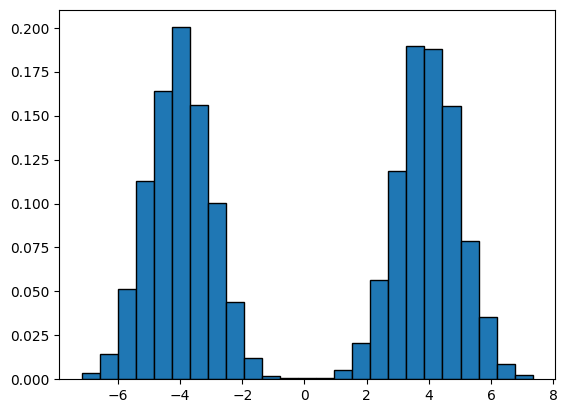

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def bimodal_sample(size: int, mu_1: float = 0.0, sigma_1: float = 1.0, mu_2: float = 0.0, sigma_2: float = 1.0, p_2: float = 0.5) -> np.ndarray:
    x_1 = np.random.standard_normal(size) * sigma_1 + mu_1
    x_2 = np.random.standard_normal(size) * sigma_2 + mu_2
    x = np.zeros(size)
    mask_for_x_2 = np.random.choice([True, False], size, p=[p_2, 1 - p_2])
    x[mask_for_x_2] = x_2[mask_for_x_2]
    x[~mask_for_x_2] = x_1[~mask_for_x_2]
    return x

np.random.seed(666)
x = bimodal_sample(10000, mu_1=4.0, mu_2=-4.0)

fig, ax = plt.subplots()
ax.hist(x, bins=25, edgecolor="black", facecolor="C0", density=True)
plt.show()


Epoch 1/2
[0/100] Loss: 7.674244403839111
[10/100] Loss: 5.619644641876221
[20/100] Loss: 4.5574116706848145
[30/100] Loss: 3.758819103240967
[40/100] Loss: 4.316142559051514
[50/100] Loss: 3.168426513671875
[60/100] Loss: 2.066073417663574
[70/100] Loss: 1.0673869848251343
[80/100] Loss: 2.0433778762817383
[90/100] Loss: 1.3888685703277588
Epoch 2/2
[0/100] Loss: 1.6589617729187012
[10/100] Loss: 1.4666777849197388
[20/100] Loss: 1.0349290370941162
[30/100] Loss: 1.3013898134231567
[40/100] Loss: 1.928599238395691
[50/100] Loss: 4.622696876525879
[60/100] Loss: 5.626887798309326
[70/100] Loss: 1.8052412271499634
[80/100] Loss: 2.6517086029052734
[90/100] Loss: 3.404942274093628
Test loop
[0/100] Loss: 1.2711282968521118
[10/100] Loss: 1.0970988273620605
[20/100] Loss: 1.1358733177185059
[30/100] Loss: 3.042513847351074
[40/100] Loss: 5.707517623901367
[50/100] Loss: 1.7817281484603882
[60/100] Loss: 3.415756940841675
[70/100] Loss: 1.1858354806900024
[80/100] Loss: 2.29132080078125
[9

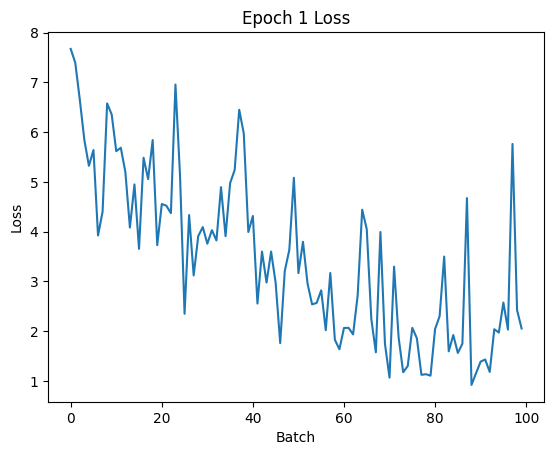

In [2]:
from conditional_diffusion.diffusion import DiffusionSettings, Diffusion
from conditional_diffusion.logger import StepLogger

BATCH_SIZE = 36
NUM_BATCHES = 100
NUM_EPOCHS = 2

train_batches = x[0:(BATCH_SIZE * NUM_BATCHES)].reshape((NUM_BATCHES, BATCH_SIZE))
test_batches = x[(BATCH_SIZE * NUM_BATCHES):(2 * BATCH_SIZE * NUM_BATCHES)].reshape((NUM_BATCHES, BATCH_SIZE))

logger = StepLogger(max_step=NUM_BATCHES, skip=10)

diffusion_settings = DiffusionSettings()
diffusion = Diffusion(diffusion_settings)

epoch_stats = []
for epoch in range(NUM_EPOCHS):
    print(f"Epoch {epoch+1}/{NUM_EPOCHS}")
    stats = diffusion.train_or_test_loop(train_batches, train=True, logger=logger)
    epoch_stats.append(stats)

print("Test loop")
diffusion.train_or_test_loop(test_batches, train=False, logger=logger)

fig, ax = plt.subplots()
ax.plot(np.arange(len(train_batches)), epoch_stats[0].loss)
ax.set_xlabel("Batch")
ax.set_ylabel("Loss")
ax.set_title("Epoch 1 Loss")
plt.show()

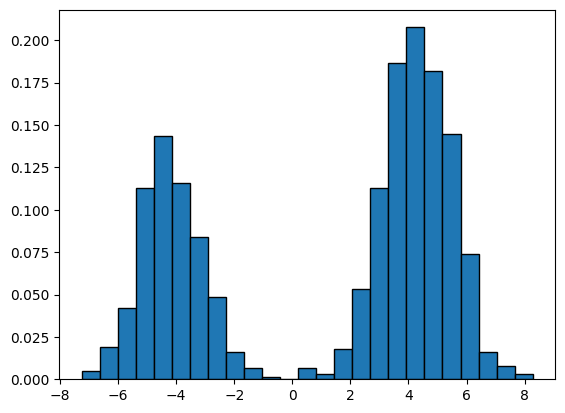

In [3]:
from conditional_diffusion.sampler import SamplerSettings, StochasticSampler

sampler_settings = SamplerSettings(s_noise=1.0, s_churn=2.0, num_steps=51)
sampler = StochasticSampler(diffusion, sampler_settings)

sample = sampler.generate_sample(size=1000, return_full=True)

fig, ax = plt.subplots()
ax.hist(sample[-1], bins=25, edgecolor="black", facecolor="C0", density=True)
plt.show()

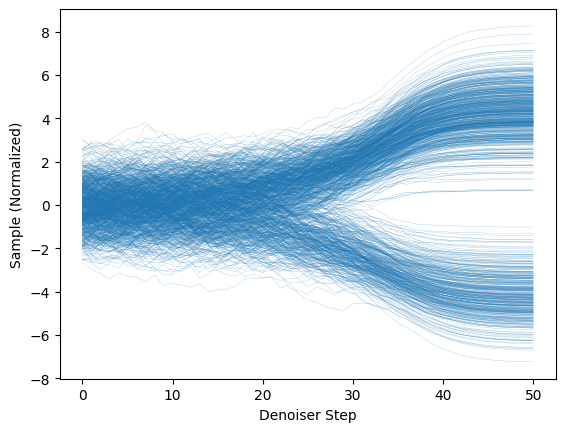

In [4]:
fig, ax = plt.subplots()
steps = np.arange(sampler_settings.num_steps)
for x in sample.T:
    ax.plot(steps, x / (1 + sampler._t_grid), c="C0", lw=0.2, alpha=0.5)
ax.set_xlabel("Denoiser Step")
ax.set_ylabel("Sample (Normalized)")
plt.show()